In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



%matplotlib inline

In [2]:
df = pd.read_csv("kdd_train.csv")
test_df = pd.read_csv("kdd_test.csv")

df = pd.concat([df, test_df], ignore_index=True)
df1 = df.copy()

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,282.850980,4.051230e+04,1.722710e+04,0.000182,0.021822,0.000121,0.196994,0.002370,0.397308,0.276231,...,182.866870,116.787910,0.524935,0.083248,0.147277,0.031895,0.276092,0.270477,0.124323,0.125298
std,2545.220043,5.409528e+06,3.703596e+06,0.013482,0.248406,0.014678,2.087903,0.058437,0.489342,22.490762,...,98.964628,110.868085,0.448749,0.190616,0.308485,0.111598,0.440218,0.441200,0.312011,0.324583
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,84.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,65.000000,0.540000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.270000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,54451.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [5]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [7]:
df['labels'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'apache2', 'mscan', 'httptunnel',
       'processtable', 'mailbomb', 'snmpguess', 'saint', 'snmpgetattack',
       'xsnoop', 'ps', 'xterm', 'sendmail', 'xlock', 'named'],
      dtype=object)

In [8]:
df.nunique()


duration                       3176
protocol_type                     3
service                          70
flag                             11
src_bytes                      3444
dst_bytes                      9689
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  93
root_shell                        2
su_attempted                      3
num_root                         86
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       511
serror_rate                      95
srv_serror_rate                  92
rerror_rate                      93
srv_rerror_rate             

In [9]:
cols = df["labels"].unique()
cols

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'apache2', 'mscan', 'httptunnel',
       'processtable', 'mailbomb', 'snmpguess', 'saint', 'snmpgetattack',
       'xsnoop', 'ps', 'xterm', 'sendmail', 'xlock', 'named'],
      dtype=object)

In [10]:
df["labels"].replace(to_replace=cols[1:],value="intrusion", inplace = True)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,intrusion
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


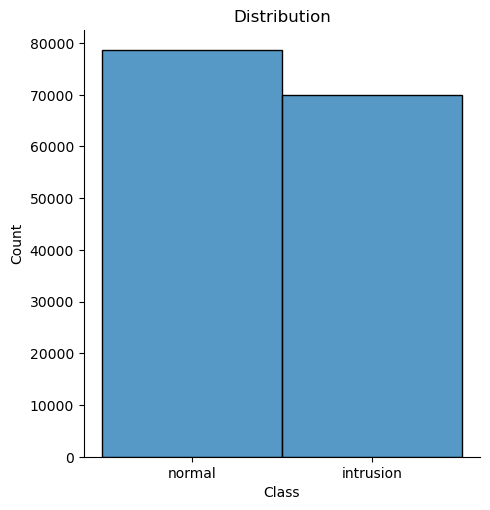

In [11]:
sns.displot(df, x='labels', kind='hist')
plt.xlabel("Class")
plt.title("Distribution")
plt.show()

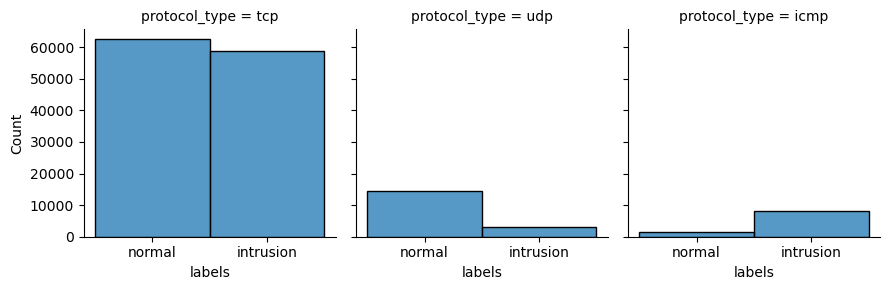

In [12]:
grid = sns.FacetGrid(df, col='protocol_type')
grid.map(sns.histplot, 'labels')
plt.show()

### Pre Processing

In [13]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'labels'], dtype='object')

In [14]:
cols = ['protocol_type','service','flag','labels']

for col in cols:
    en = LabelEncoder()

    df[col] = en.fit_transform(df[col])

class_names = en.classes_

### Test-Train Split

In [15]:
X = df.drop(["labels"], axis=1)
y = df["labels"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=13)

In [16]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

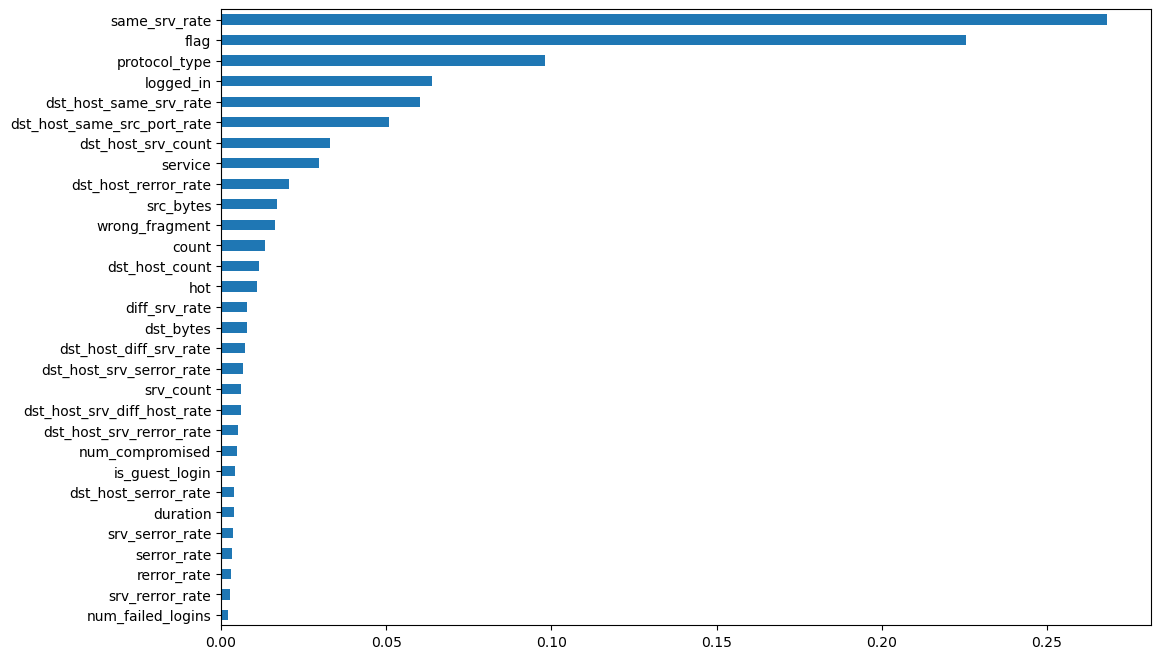

In [17]:
plt.figure(figsize=[12, 8])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).head(30).iloc[::-1].plot(kind='barh')
plt.show()

In [18]:
top_features = feat_importances.nlargest(30).index
print(top_features)

Index(['same_srv_rate', 'flag', 'protocol_type', 'logged_in',
       'dst_host_same_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_count', 'service', 'dst_host_rerror_rate', 'src_bytes',
       'wrong_fragment', 'count', 'dst_host_count', 'hot', 'diff_srv_rate',
       'dst_bytes', 'dst_host_diff_srv_rate', 'dst_host_srv_serror_rate',
       'srv_count', 'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate',
       'num_compromised', 'is_guest_login', 'dst_host_serror_rate', 'duration',
       'srv_serror_rate', 'serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'num_failed_logins'],
      dtype='object')


In [19]:
columns=['same_srv_rate', 'flag', 'protocol_type', 'dst_host_same_srv_rate',
       'logged_in', 'dst_host_same_src_port_rate', 'service',
       'dst_host_srv_count', 'dst_host_rerror_rate', 'src_bytes',
       'wrong_fragment', 'hot', 'dst_host_count', 'count',
       'dst_host_diff_srv_rate', 'dst_host_srv_serror_rate', 'dst_bytes',
       'dst_host_srv_diff_host_rate', 'srv_count', 'serror_rate',
       'num_compromised', 'dst_host_srv_rerror_rate', 'is_guest_login',
       'dst_host_serror_rate', 'duration', 'srv_rerror_rate', 'rerror_rate',
       'srv_serror_rate', 'diff_srv_rate', 'num_failed_logins']
#We will continue our model with top 30 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

In [20]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training

### Binary Classification

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn import metrics

In [22]:
# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=13, n_iter_no_change=5)

gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_gbc)
class_report = classification_report(y_test, y_pred_gbc, target_names=class_names)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9929639105844331

Classification Report:
              precision    recall  f1-score   support

   intrusion       0.99      0.99      0.99     13970
      normal       0.99      0.99      0.99     15734

    accuracy                           0.99     29704
   macro avg       0.99      0.99      0.99     29704
weighted avg       0.99      0.99      0.99     29704



In [23]:
# SVC
linear_svm = svm.SVC(kernel='linear')

linear_svm.fit(X_train, y_train)

y_pred_linear = linear_svm.predict(X_test)

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
class_report = classification_report(y_test, y_pred_linear, target_names=class_names)

print("\nClassification Report:")
print(class_report)

Accuracy: 0.9471115001346619

Classification Report:
              precision    recall  f1-score   support

   intrusion       0.97      0.92      0.94     13970
      normal       0.93      0.97      0.95     15734

    accuracy                           0.95     29704
   macro avg       0.95      0.95      0.95     29704
weighted avg       0.95      0.95      0.95     29704



In [25]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=13)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt, target_names=class_names)

print("Accuracy:", accuracy)

print("\nClassification Report:")
print(class_report)

Accuracy: 0.9969027740371668

Classification Report:
              precision    recall  f1-score   support

   intrusion       1.00      1.00      1.00     13970
      normal       1.00      1.00      1.00     15734

    accuracy                           1.00     29704
   macro avg       1.00      1.00      1.00     29704
weighted avg       1.00      1.00      1.00     29704



### Multi-Class Classification

In [26]:
(df1['labels'].value_counts())

normal             78588
neptune            47868
satan               4331
ipsweep             4078
portsweep           3302
smurf               3186
nmap                1699
back                1183
warezclient          997
teardrop             996
guess_passwd         464
mscan                310
warezmaster          299
pod                  236
apache2              228
processtable         211
snmpguess             99
mailbomb              94
saint                 93
buffer_overflow       47
snmpgetattack         43
httptunnel            41
land                  20
multihop              16
rootkit               14
loadmodule            13
imap                  13
ftp_write             10
ps                     9
sendmail               8
phf                    5
perl                   4
xlock                  4
xterm                  3
spy                    2
named                  2
xsnoop                 1
Name: labels, dtype: int64

In [27]:
def others(df):
    counts = df['labels'].value_counts()
    labels_to_replace = counts[counts <= 100].index

    df['labels'] = df['labels'].replace(labels_to_replace, 'Other')
    return df

df2 = others(df1.copy())

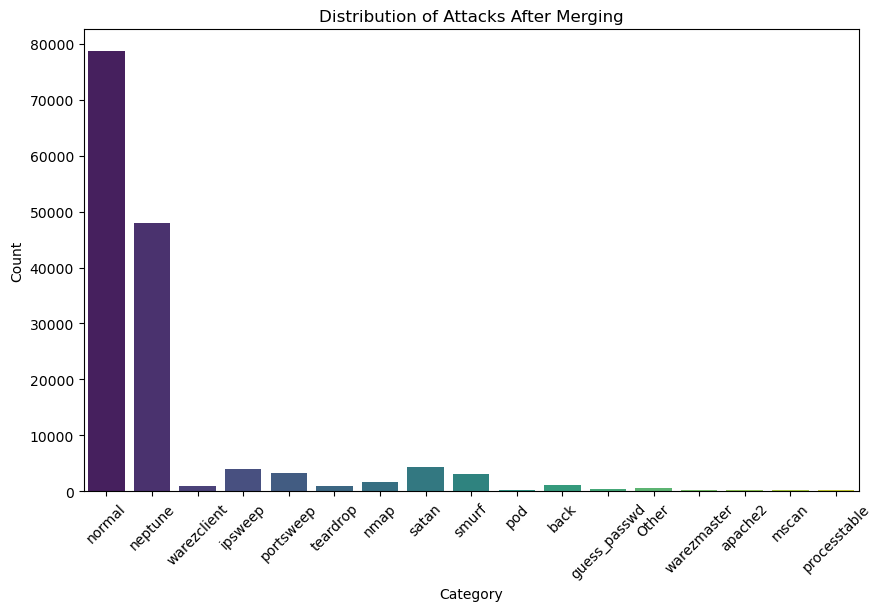

normal          78588
neptune         47868
satan            4331
ipsweep          4078
portsweep        3302
smurf            3186
nmap             1699
back             1183
warezclient       997
teardrop          996
Other             541
guess_passwd      464
mscan             310
warezmaster       299
pod               236
apache2           228
processtable      211
Name: labels, dtype: int64

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='labels', data=df2, palette='viridis')
plt.title('Distribution of Attacks After Merging')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
(df2['labels'].value_counts())

In [29]:
cat_features = df2.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'labels'], dtype='object')

In [30]:
df2['labels'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'Other', 'warezmaster', 'apache2', 'mscan',
       'processtable'], dtype=object)

In [31]:
cols = ['protocol_type','service','flag','labels']

for col in cols:
    en = LabelEncoder()

    df2[col] = en.fit_transform(df2[col])

class_names = en.classes_

In [32]:
X = df2.drop(["labels"], axis=1)
y = df2["labels"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [33]:
columns=['same_srv_rate', 'flag', 'protocol_type', 'dst_host_same_srv_rate',
       'logged_in', 'dst_host_same_src_port_rate', 'service',
       'dst_host_srv_count', 'dst_host_rerror_rate', 'src_bytes',
       'wrong_fragment', 'hot', 'dst_host_count', 'count',
       'dst_host_diff_srv_rate', 'dst_host_srv_serror_rate', 'dst_bytes',
       'dst_host_srv_diff_host_rate', 'srv_count', 'serror_rate',
       'num_compromised', 'dst_host_srv_rerror_rate', 'is_guest_login',
       'dst_host_serror_rate', 'duration', 'srv_rerror_rate', 'rerror_rate',
       'srv_serror_rate', 'diff_srv_rate', 'num_failed_logins']
#We will continue our model with top 30 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### GradientBoostingClassifier

In [35]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=13, n_iter_no_change=5)

gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_gbc)
class_report = classification_report(y_test, y_pred_gbc, target_names=class_names)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9810463237274442

Classification Report:
              precision    recall  f1-score   support

       Other       0.50      0.54      0.52       108
     apache2       0.98      0.96      0.97        46
        back       1.00      1.00      1.00       237
guess_passwd       0.99      0.76      0.86        93
     ipsweep       0.99      0.93      0.96       816
       mscan       0.93      0.66      0.77        62
     neptune       1.00      1.00      1.00      9574
        nmap       0.96      0.87      0.91       340
      normal       0.98      0.99      0.98     15718
         pod       0.97      0.60      0.74        47
   portsweep       1.00      0.83      0.90       660
processtable       0.84      0.98      0.90        42
       satan       0.97      0.97      0.97       866
       smurf       1.00      0.96      0.98       637
    teardrop       0.99      1.00      0.99       199
 warezclient       0.88      0.90      0.89       199
 warezmaster       0.96     

#### SVC


In [36]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear', random_state=13)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)


# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.980776999730676

Classification Report:
              precision    recall  f1-score   support

       Other       0.40      0.04      0.07       108
     apache2       0.90      0.98      0.94        46
        back       0.92      0.98      0.95       237
guess_passwd       0.88      0.41      0.56        93
     ipsweep       0.95      0.93      0.94       816
       mscan       0.87      0.77      0.82        62
     neptune       1.00      1.00      1.00      9574
        nmap       0.78      0.95      0.86       340
      normal       0.98      0.99      0.99     15718
         pod       0.92      1.00      0.96        47
   portsweep       0.96      0.99      0.97       660
processtable       1.00      1.00      1.00        42
       satan       0.95      0.94      0.95       866
       smurf       1.00      0.99      0.99       637
    teardrop       0.98      0.99      0.98       199
 warezclient       0.78      0.86      0.82       199
 warezmaster       0.92      

#### Decision Tree Classifier

In [37]:
dtc = DecisionTreeClassifier(random_state=13)

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.9958591435496903

Classification Report:
              precision    recall  f1-score   support

       Other       0.71      0.76      0.73       108
     apache2       0.98      1.00      0.99        46
        back       0.99      1.00      1.00       237
guess_passwd       1.00      0.98      0.99        93
     ipsweep       1.00      1.00      1.00       816
       mscan       0.98      0.92      0.95        62
     neptune       1.00      1.00      1.00      9574
        nmap       0.99      0.99      0.99       340
      normal       1.00      1.00      1.00     15718
         pod       0.94      1.00      0.97        47
   portsweep       0.99      0.99      0.99       660
processtable       0.93      1.00      0.97        42
       satan       0.98      0.98      0.98       866
       smurf       1.00      1.00      1.00       637
    teardrop       0.99      1.00      0.99       199
 warezclient       0.98      0.99      0.98       199
 warezmaster       0.95     

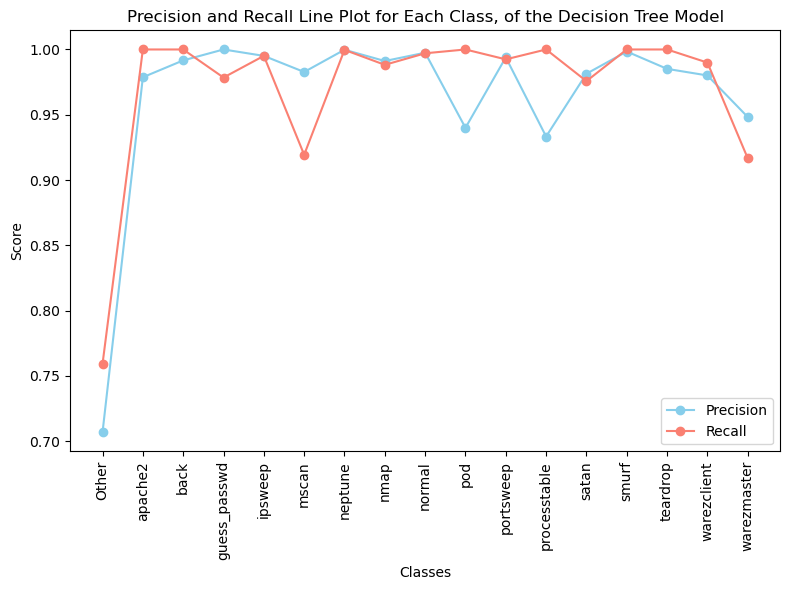

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

plt.figure(figsize=(8, 6))
plt.plot(report_df.index, report_df['precision'], marker='o', color='skyblue', label='Precision')
plt.plot(report_df.index, report_df['recall'], marker='o', color='salmon', label='Recall')

plt.xlabel("Classes")
plt.ylabel("Score")
plt.title("Precision and Recall Line Plot for Each Class, of the Decision Tree Model")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()
